In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [3]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from studentsperformance',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

# 1. Are the exam score variables distributed normally? If not, apply Box-Cox transformation. Does anything change?

In [4]:
education_df["math score"].unique()

array([ 72,  69,  90,  47,  76,  71,  88,  40,  64,  38,  58,  65,  78,
        50,  18,  46,  54,  66,  44,  74,  73,  67,  70,  62,  63,  56,
        97,  81,  75,  57,  55,  53,  59,  82,  77,  33,  52,   0,  79,
        39,  45,  60,  61,  41,  49,  30,  80,  42,  27,  43,  68,  85,
        98,  87,  51,  99,  84,  91,  83,  89,  22, 100,  96,  94,  48,
        35,  34,  86,  92,  37,  28,  24,  26,  95,  36,  29,  32,  93,
        19,  23,   8])

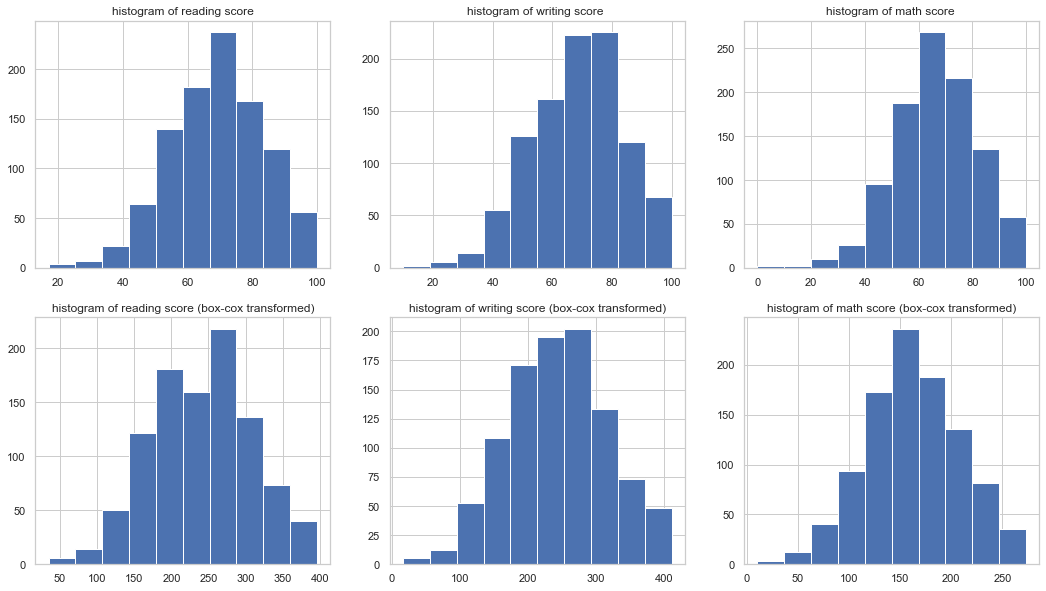

In [11]:
from scipy.stats import boxcox

reading_score_boxcox,_ = boxcox(education_df["reading score"])
writing_score_boxcox,_ = boxcox(education_df["writing score"])
math_score_boxcox,_ = boxcox(education_df[education_df["math score"] > 0]["math score"])

plt.figure(figsize=(18,10))

plt.subplot(2,3,1)
plt.hist(education_df["reading score"])
plt.title("histogram of reading score")

plt.subplot(2,3,2)
plt.hist(education_df["writing score"])
plt.title("histogram of writing score ")

plt.subplot(2,3,3)
plt.hist(education_df["math score"])
plt.title("histogram of math score ")

plt.subplot(2,3,4)
plt.hist(reading_score_boxcox)
plt.title("histogram of reading score (box-cox transformed)")

plt.subplot(2,3,5)
plt.hist(writing_score_boxcox)
plt.title("histogram of writing score (box-cox transformed)")

plt.subplot(2,3,6)
plt.hist(math_score_boxcox)
plt.title("histogram of math score (box-cox transformed)")

plt.show()

In [23]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(education_df["reading score"])
norm_stats = normaltest(education_df["reading score"])

print("reading")
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0],jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))
print("----------------------------------------------------------------------------------")


jb_stats = jarque_bera(education_df["writing score"])
norm_stats = normaltest(education_df["writing score"])

print("writing")
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0],jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))
print("----------------------------------------------------------------------------------")


jb_stats = jarque_bera(education_df["math score"])
norm_stats = normaltest(education_df["math score"])

print("math")
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0],jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))
print("----------------------------------------------------------------------------------")

reading
Jarque-Bera test statistics is 11.383300575987892 and p value is 0.0033740202672214448
Normality test statistics is 11.11741279628622 and p value is 0.003853758403576582
----------------------------------------------------------------------------------
writing
Jarque-Bera test statistics is 13.98509448257235 and p value is 0.0009187033894586527
Normality test statistics is 13.606450837263859 and p value is 0.0011101885439899974
----------------------------------------------------------------------------------
reading
Jarque-Bera test statistics is 11.383300575987892 and p value is 0.0033740202672214448
Normality test statistics is 11.11741279628622 and p value is 0.003853758403576582
----------------------------------------------------------------------------------
math
Jarque-Bera test statistics is 15.912256686712709 and p value is 0.0003505075386818213
Normality test statistics is 15.408960513931822 and p value is 0.00045080293869937836
--------------------------------------

In [25]:
jb_stats = jarque_bera(reading_score_boxcox)
norm_stats = normaltest(reading_score_boxcox)

print("reading boxcox")
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0],jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))
print("----------------------------------------------------------------------------------")


jb_stats = jarque_bera(writing_score_boxcox)
norm_stats = normaltest(writing_score_boxcox)

print("writing boxcox")
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0],jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))
print("----------------------------------------------------------------------------------")


jb_stats = jarque_bera(math_score_boxcox)
norm_stats = normaltest(math_score_boxcox)

print("math boxcox")
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0],jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))
print("----------------------------------------------------------------------------------")

reading boxcox
Jarque-Bera test statistics is 4.119778573559666 and p value is 0.127468081515408
Normality test statistics is 5.282274606965809 and p value is 0.07128015626992971
----------------------------------------------------------------------------------
writing boxcox
Jarque-Bera test statistics is 4.746478090042761 and p value is 0.09317842784043195
Normality test statistics is 6.267311355052559 and p value is 0.04355827085003712
----------------------------------------------------------------------------------
math boxcox
Jarque-Bera test statistics is 1.7200982636836308 and p value is 0.42314129209599327
Normality test statistics is 1.8323075851586939 and p value is 0.4000547794685686
----------------------------------------------------------------------------------


# 2. Say, we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed or not. If it's not normally distributed, apply Box-Cox transformation and check whether the transformed variable is normally distributed.

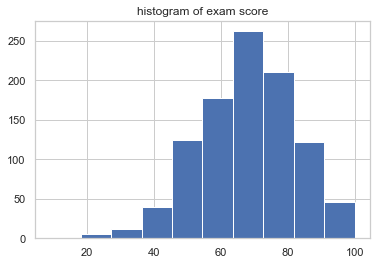

Jarque-Bera test statistics is 15.453387913085168 and p value is 0.00044089934264401887
Normality test statistics is 15.186721327231322 and p value is 0.0005037851534494478


In [27]:
exam_score = (education_df["math score"] + education_df["reading score"] + education_df["writing score"])/3

plt.hist(exam_score)
plt.title("histogram of exam score")
plt.show()

jb_stats = jarque_bera(exam_score)
norm_stats = normaltest(exam_score)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0],jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0],norm_stats[1]))

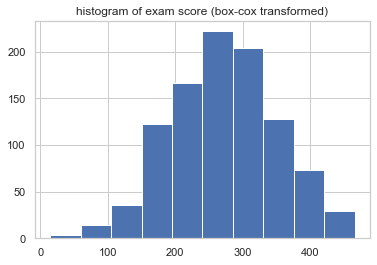

Jarque-Bera test statistics is 2.4353989331279 and p value is 0.2959101356398447
Normality test statistics is 2.779857602227616 and p value is 0.24909303914726724


In [29]:
exam_boxcox,_ = boxcox(exam_score)

plt.hist(exam_boxcox)
plt.title("histogram of exam score (box-cox transformed)")
plt.show()

jb_stats = jarque_bera(exam_boxcox)
norm_stats = normaltest(exam_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0],jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0],norm_stats[1]))

# 3. Which variables do seem to be related with the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of the success in the exams, which variables in our dataset might be useful?

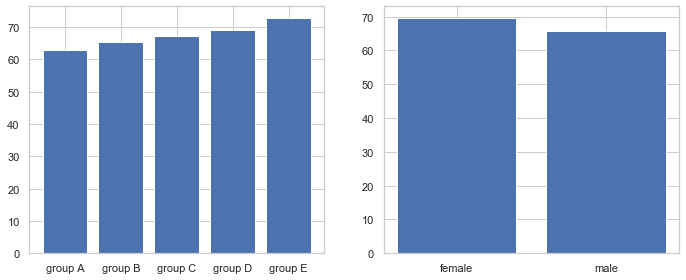

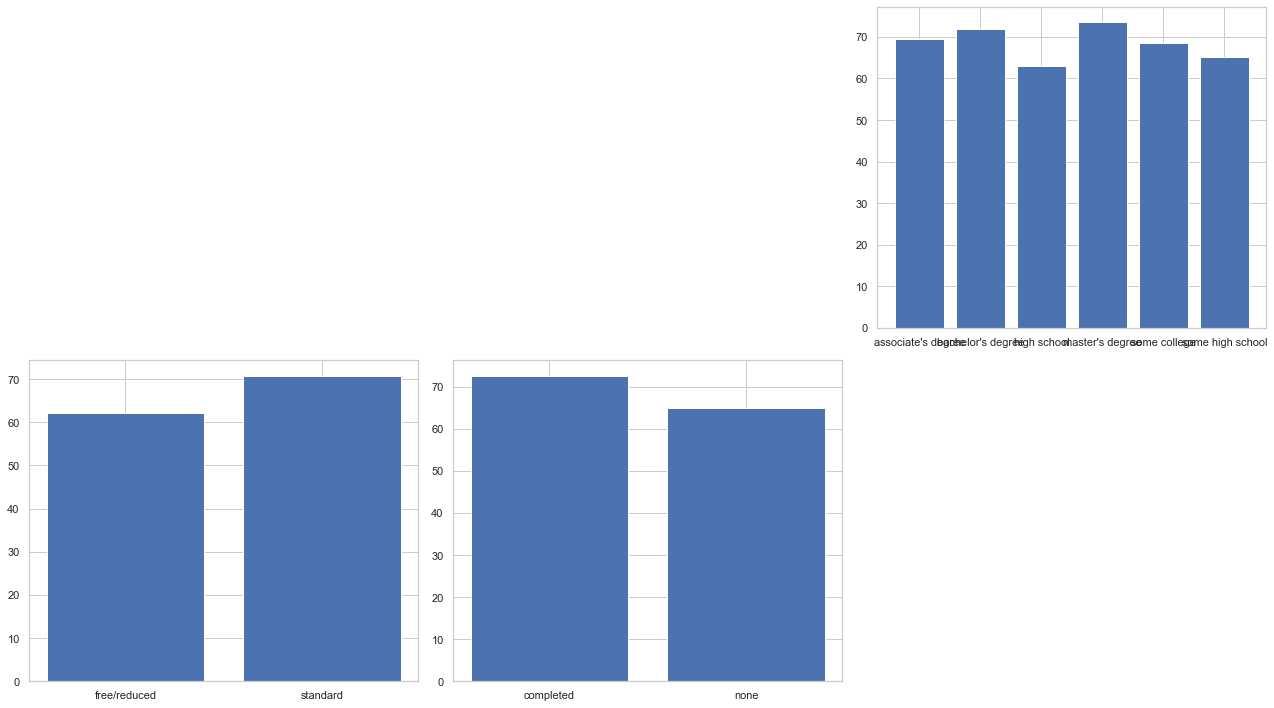

In [34]:
education_df["exam_score"] = exam_score

plt.figure(figsize=(18, 10))

plt.subplot(2,3,1)
plt.bar(education_df.groupby("race/ethnicity")["exam_score"].mean().index, education_df.groupby("race/ethnicity")["exam_score"].mean())


plt.subplot(2,3,2)
plt.bar(education_df.groupby("gender")["exam_score"].mean().index, education_df.groupby("gender")["exam_score"].mean())

education_df["exam_score"] = exam_score

plt.figure(figsize=(18, 10))

plt.subplot(2,3,3)
plt.bar(education_df.groupby("parental level of education")["exam_score"].mean().index, education_df.groupby("parental level of education")["exam_score"].mean())


plt.subplot(2,3,4)
plt.bar(education_df.groupby("lunch")["exam_score"].mean().index, education_df.groupby("lunch")["exam_score"].mean())


plt.subplot(2,3,5)
plt.bar(education_df.groupby("test preparation course")["exam_score"].mean().index, education_df.groupby("test preparation course")["exam_score"].mean())


plt.tight_layout()
plt.show()

